In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully!
Dataset shape: (7043, 21)


In [34]:
print("Missing values in each column:")
print(df.isnull().sum())

print("\nTotal missing values:", df.isnull().sum().sum())

Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Total missing values: 0


In [35]:
print("Data types:")
print(df.dtypes)

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [36]:
print("Unique values in categorical columns:")
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService']
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Unique values in categorical columns:
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']


In [37]:
print("TotalCharges unique values sample:")
print(df['TotalCharges'].unique()[:10])

print("SeniorCitizen distribution:")
print(df['SeniorCitizen'].value_counts())

TotalCharges unique values sample:
['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']
SeniorCitizen distribution:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


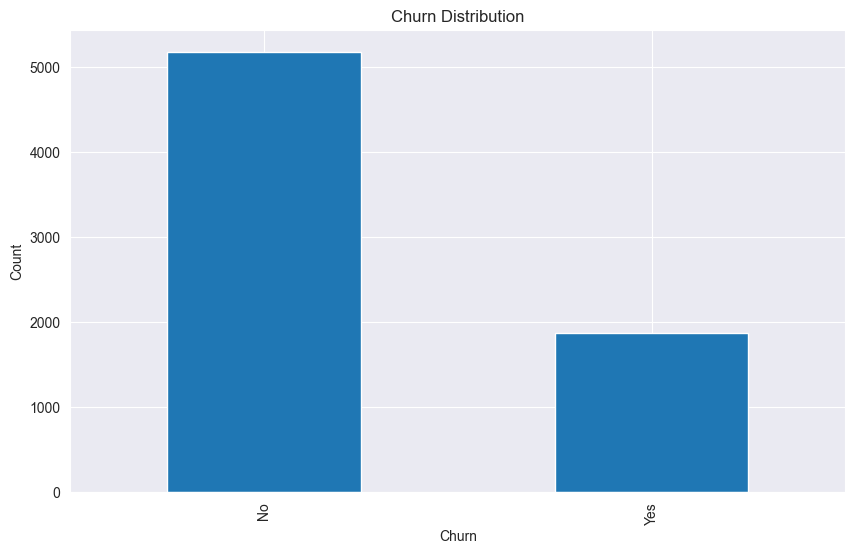

In [38]:
plt.figure(figsize=(10, 6))
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [39]:
print("TotalCharges unique values before:")
print(df['TotalCharges'].unique()[:10])

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("Missing values after conversion:", df['TotalCharges'].isnull().sum())

TotalCharges unique values before:
['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']
Missing values after conversion: 11


In [40]:
median_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_charges)

print("Missing values after filling:", df['TotalCharges'].isnull().sum())

Missing values after filling: 0


In [41]:
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("Churn counts:")
print(churn_counts)
print("\nChurn percentages:")
print(churn_percentage)

Churn counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn percentages:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


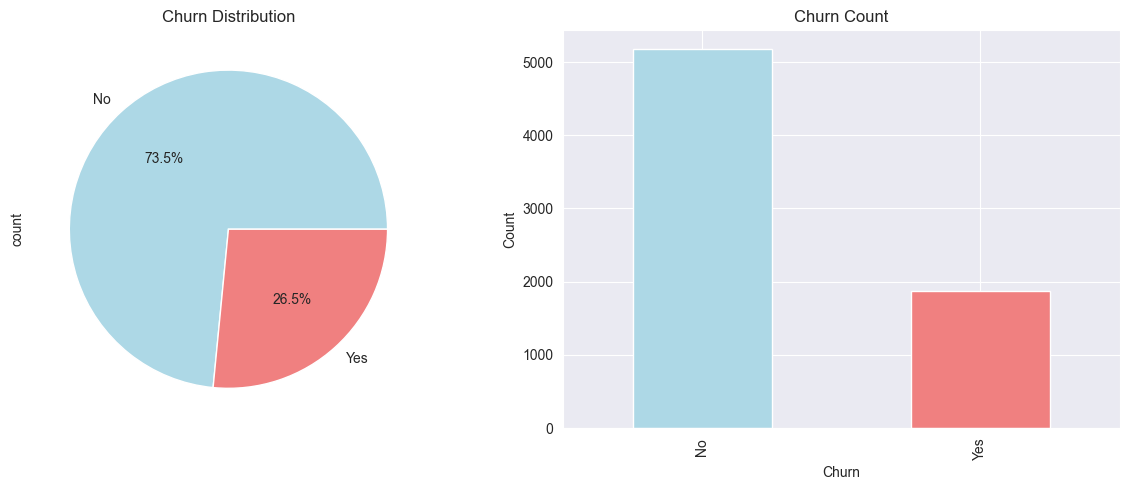

In [42]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Churn Distribution')

plt.subplot(1, 2, 2)
df['Churn'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

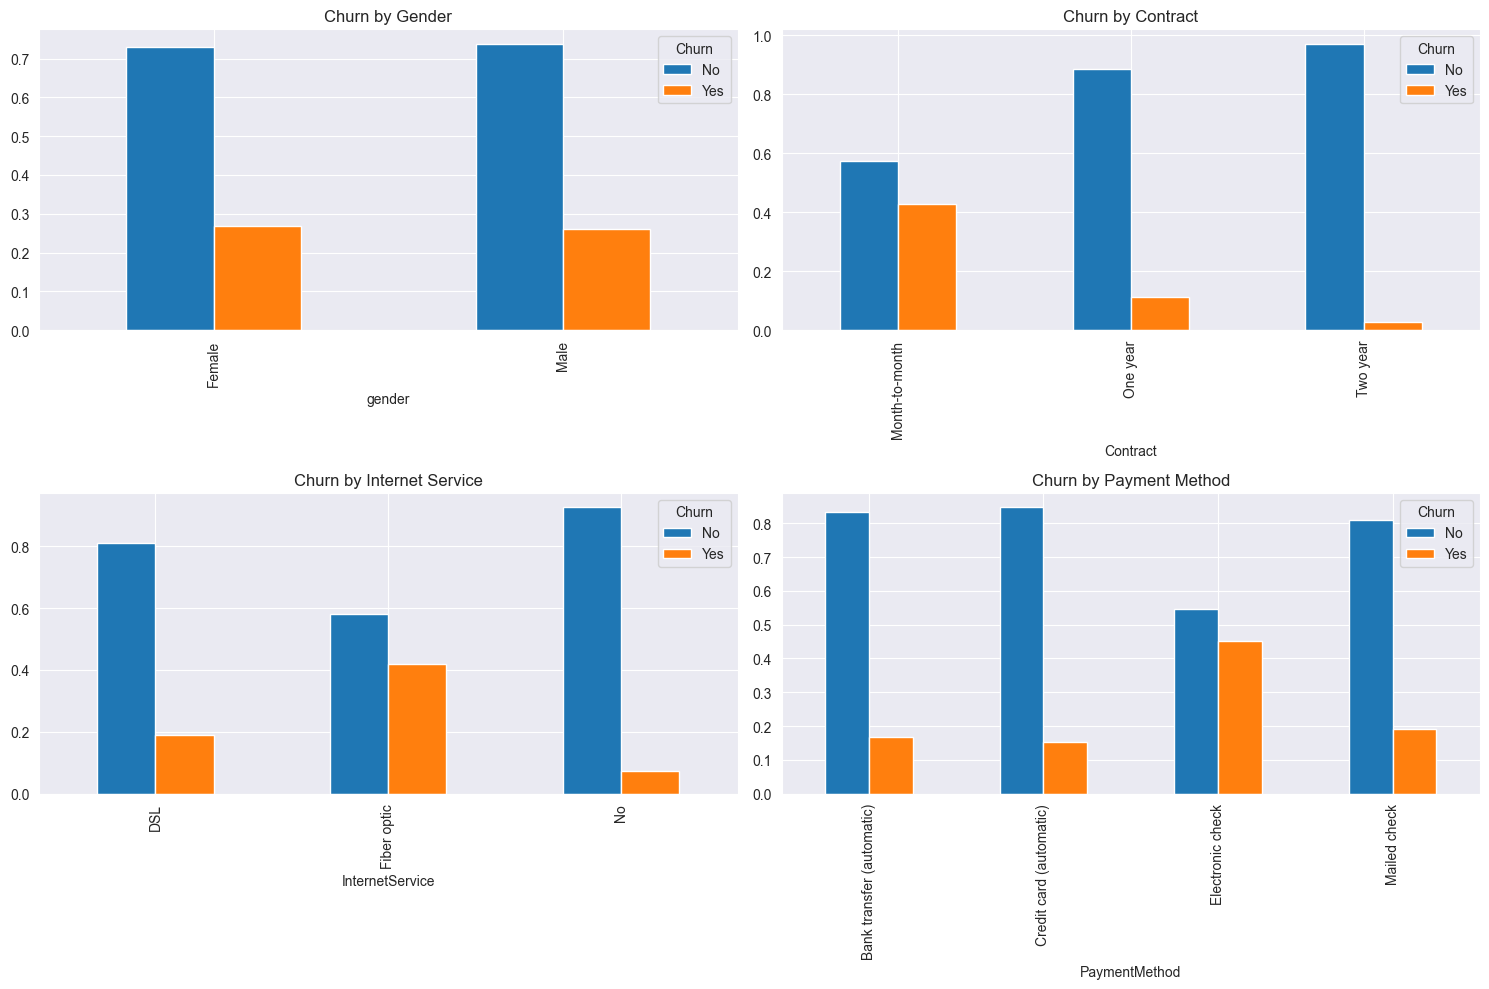

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df.groupby('gender')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Churn by Gender')

df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Churn by Contract')

df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Churn by Internet Service')

df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Churn by Payment Method')

plt.tight_layout()
plt.show()

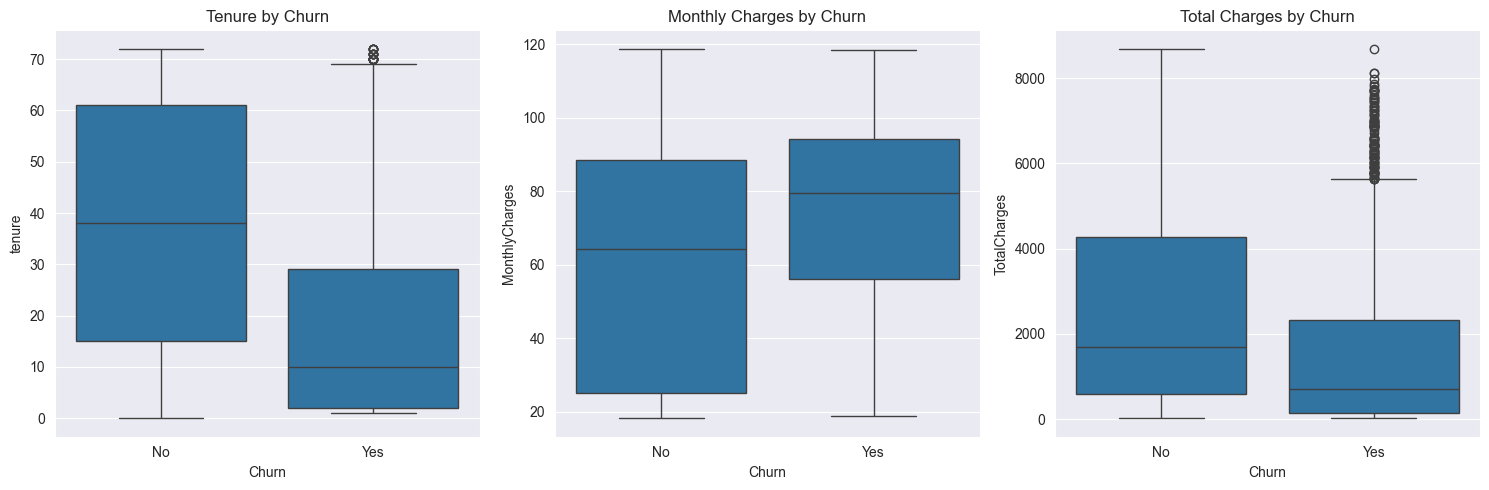

In [44]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn')

plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')

plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges by Churn')

plt.tight_layout()
plt.show()

In [45]:
churn_ratio = churn_counts['Yes'] / churn_counts['No']
print(f"Churn to Non-Churn ratio: {churn_ratio:.2f}")
print(f"Minority class percentage: {churn_percentage['Yes']:.1f}%")

Churn to Non-Churn ratio: 0.36
Minority class percentage: 26.5%
